## Mining and Leveraging Personal LinkedIn Data

Unlock the power of your LinkedIn network through custom data visualizations and data mining. Read our Medium article on how to access your data through LinkedIn's [data download center](https://www.linkedin.com/help/linkedin/answer/50191/downloading-your-account-data?lang=en) and leverage your network towards your career goals. Please feel invited to clone this repository or download this Jupyter Notebook and upload your own data. With exception of a couple of lines of code, this entire notebook is customizable to fit your LinkedIn data. The LinkedIn datasets can also be analyzed via Tableau, and used to build a useful dashboard to view and filter your connections, their employers and more. 

#### This data mining exercise answers questions such as: 
* [What does the distribution of my network growth look like year by year? ](#distyear)
* [Are there any prevalent job titles amongst my network?](#network)
* [Which companies do I follow?](#companies)
* [Do any of my connections work at companies I follow?](#connections)
* [What percentage of my connections work at companies I follow?](#percentage)
* [How often do I message with my network?](#message)
* [What is the average number of messages I sent every month in 2020?](#average)
* [Which top 3 connections did I send the most messages to in 2020?](#work)
* [Which companies do most of my connections work at?](#most)

Medium article: 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Importing data source
connections = pd.read_csv('/Users/mitzibandera/Data Files/LinkedIn/Connections.csv')

In [3]:
# Importing data source
companies = pd.read_csv('/Users/mitzibandera/Data Files/LinkedIn/Company Follows.csv')

In [4]:
# Importing data source
messages = pd.read_csv('/Users/mitzibandera/Data Files/LinkedIn/messages.csv')

In [5]:
#Inspecting data
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 6 columns):
First Name       375 non-null object
Last Name        375 non-null object
Email Address    5 non-null object
Company          373 non-null object
Position         373 non-null object
Connected On     376 non-null object
dtypes: object(6)
memory usage: 17.8+ KB


In [42]:
connections

In [7]:
# Replacing the column names (making them lowercase)
connections.columns = connections.columns.str.lower()

In [8]:
# Replacing the column names (making them lowercase)
companies.columns = companies.columns.str.lower()

In [9]:
# Replacing the column names (making them lowercase)
messages.columns = messages.columns.str.lower()

In [10]:
# Extracting year and creating new column
connections['year'] = pd.DatetimeIndex(connections['connected on']).year

In [11]:
# Naming a column 'company' so I can merge tables later on
companies = companies.rename(columns={"organization": 'company'})

In [12]:
# Creating an id column
connections["id"] = connections.index + 1

In [13]:
# Looking for missing values using isnull()
print(connections.columns[connections.isnull().any()])

Index(['first name', 'last name', 'email address', 'company', 'position'], dtype='object')


In [14]:
# Inspecting number of missing values 
connections.isnull().sum()

first name         1
last name          1
email address    371
company            3
position           3
connected on       0
year               0
id                 0
dtype: int64

### What does the distribution of my network growth look like year by year? <a class="anchor" id="distyear"></a>

In [15]:
# Pivot table 
connections_pivot = pd.pivot_table(connections, index = ['year'],
                                values = ['id'], aggfunc = [len])
connections_pivot

,len
,id
year,
2012,7
2013,41
2014,29
2015,15
2016,23
2017,37
2018,36
2019,129


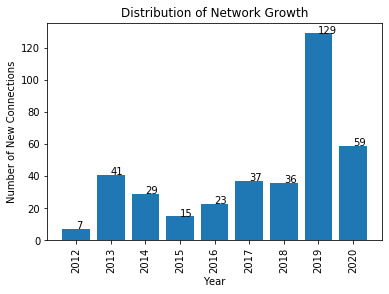

In [16]:
# Bar chart
x = ('2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020')
y = connections_pivot[('len', 'id')]

plt.bar(x, y)

plt.xticks(x, rotation='vertical')

plt.title('Distribution of Network Growth')
plt.xlabel('Year')
plt.ylabel('Number of New Connections')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

### Are there any prevalent job titles amongst my network?  <a class="anchor" id="network"></a>

In [17]:
# Inspecting categorical data
connections['position'].value_counts()

Program Manager                    4
Program Coordinator                4
Owner                              4
Software Engineer                  4
Co-Founder                         3
                                  ..
Published Author                   1
Employment Visa Advisor            1
Executive Editor                   1
Sustainable Finance Consultant     1
Business Analyst                   1
Name: position, Length: 336, dtype: int64

### Which companies do I follow?  <a class="anchor" id="companies"></a>

In [18]:
# Adding a new column 
companies['network_connection'] = 'Yes'

In [19]:
# Discarting data I do not need 
companies = companies.drop(columns=['followed on'])

In [20]:
companies

,company,network_connection
0,Google,Yes
1,Santa Monica College,Yes
2,Practicum by Yandex,Yes
3,Dataquest.io,Yes
4,Women Impact Tech,Yes
5,Black Girls CODE,Yes
6,1ST-Gen Scholars,Yes
7,RAND Corporation,Yes
8,UCLA Agile Visual Analytics Lab,Yes
9,Latinx in AI,Yes


### Do any of my connections work at companies I follow?  <a class="anchor" id="connections"></a>

In [21]:
# Merging our data: connections, companies
linkedin = companies.merge(connections, how='left', on=['company'])

In [43]:
# Showing list of contacts who work at companies I follow
linkedin

### What percentage of my connections work at companies I follow? <a class="anchor" id="percentage"></a>

In [23]:
# Showing percentage of contacts who work at companies I follow
print(round((len(linkedin)/len(connections))*100), '% of my connections work at companies that I follow on LinkedIn.')

10 % of my connections work at companies that I follow on LinkedIn.


### How often do I message with my network? <a class="anchor" id="message"></a>

In [24]:
# Inspecting data 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
conversation id       211 non-null object
conversation title    1 non-null object
from                  211 non-null object
to                    211 non-null object
date                  211 non-null object
subject               15 non-null object
content               206 non-null object
folder                211 non-null object
dtypes: object(8)
memory usage: 13.3+ KB


In [25]:
# Discarting data I do not need 
messages = messages.drop(columns=['conversation id', 'conversation title', 'subject', 'folder'])

In [26]:
# Extracting year and creating new column
messages['year'] = pd.DatetimeIndex(messages['date']).year

In [27]:
# Creating an id column
messages["id"] = messages.index + 1

#### Incoming

In [28]:
# Quering for outgoing messages
messages_in = messages.query("to in 'Mitzi Bandera'")

In [29]:
# Pivot table 
messages_in_pivot = pd.pivot_table(messages_in, index = ['year'],
                                values = ['id'], aggfunc = [len])
messages_in_pivot

,len
,id
year,
2012,2
2013,8
2014,4
2016,9
2017,19
2018,19
2019,36
2020,40


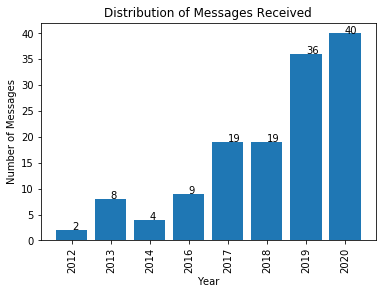

In [30]:
# Bar chart
x = ('2012', '2013', '2014', '2016', '2017', '2018', '2019', '2020')
y = messages_in_pivot[('len', 'id')]

plt.bar(x, y)

plt.xticks(x, rotation='vertical')

plt.title('Distribution of Messages Received')
plt.xlabel('Year')
plt.ylabel('Number of Messages')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

#### Outgoing

In [31]:
# Quering for outgoing messages
messages_out = messages.query("to not in 'Mitzi Bandera'")

In [32]:
# Pivot table 
messages_out_pivot = pd.pivot_table(messages_out, index = ['year'],
                                values = ['id'], aggfunc = [len])
messages_out_pivot

,len
,id
year,
2012,1
2013,5
2014,2
2016,4
2017,14
2018,9
2019,17
2020,22


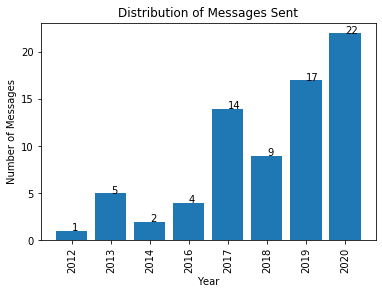

In [33]:
# Bar chart
x = ('2012', '2013', '2014', '2016', '2017', '2018', '2019', '2020')
y = messages_out_pivot[('len', 'id')]

plt.bar(x, y)
plt.xticks(x, rotation='vertical')

plt.title('Distribution of Messages Sent')
plt.xlabel('Year')
plt.ylabel('Number of Messages')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

### What is the average number of messages I sent every month in 2020?  <a class="anchor" id="average"></a>

In [34]:
# Querying for messages sent in 2020 
messages_out_2020 = messages_out.query("year in '2020'")

In [35]:
# Extracting month and creating new column
messages_out_2020['month'] = pd.DatetimeIndex(messages_out_2020['date']).month

/Users/mitzibandera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
# Pivot table 
messages_out_2020_pivot = pd.pivot_table(messages_out_2020, index = ['month'],
                                values = ['id'], aggfunc = [len])
# Displaying pivot table
messages_out_2020_pivot

,len
,id
month,
1,8
2,11
3,1
4,2


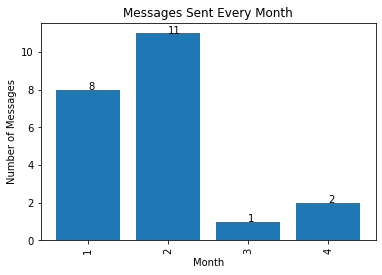

In [37]:
# Bar chart
x = ('1', '2', '3', '4')
y = messages_out_2020_pivot[('len', 'id')]

plt.bar(x, y)
plt.xticks(x, rotation='vertical')

plt.title('Messages Sent Every Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

In [38]:
print(round((len(linkedin)/len(connections))*100), '% of my connections work at companies that I follow on LinkedIn.')

10 % of my connections work at companies that I follow on LinkedIn.


### Which top 3 connections did I send the most messages to in 2020? <a class="anchor" id="most"></a>

In [39]:
# Querying for 2020 messages sent by me 
messages_2020 = messages.query("year in '2020' and to not in 'Mitzi Bandera'")

In [44]:
# Printing number of messages 
messages_2020['to'].value_counts().head(3)

### Which companies do most of my connections work at? <a class="anchor" id="work"></a>

In [41]:
linkedin['company'].value_counts().head(4)

University of California, Los Angeles    17
Google                                    6
University of California, Santa Cruz      3
RAND Corporation                          2
Name: company, dtype: int64